In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f"Shape of the X_train: {X_train.shape}")
print(f"Shape of the X_test: {X_test.shape}")
print(f"Shape of the y_train: {y_train.shape}")
print(f"Shape of the y_test: {y_test.shape}")

Shape of the X_train: (60000, 28, 28)
Shape of the X_test: (10000, 28, 28)
Shape of the y_train: (60000,)
Shape of the y_test: (10000,)


In [5]:
single_image = X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

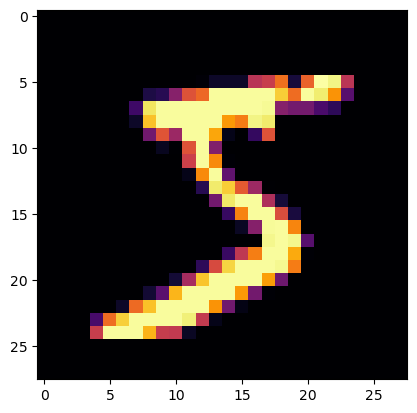

In [6]:
# Just because images in mnist dataset are 2D shape, we can plot with imshow
# we can change cmap as we want, vut it does not mean that images are RGB
plt.imshow(single_image, cmap="inferno")

In [7]:
# these are categories, not continous values, thats why they should be encoded
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example.shape

(60000, 10)

In [11]:
# it indicates, that this example belongs to number 5
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [13]:
# images in mnist dataset are 2D shape and grayscale, therefore max pixel value is 255
single_image.max()

255

In [14]:
# grayscale images, therefore min pixel value is 0
single_image.min()

0

### Scaling images to prevent exploring/vanishing gradient problem

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
scaled_image = X_train[0]

In [17]:
print(f"Max pixel value of an image after MinMaxNormalize: {scaled_image.max()}")
print(f"Min pixel value of an image after MinMaxNormalize: {scaled_image.min()}")

Max pixel value of an image after MinMaxNormalize: 1.0
Min pixel value of an image after MinMaxNormalize: 0.0


### Reshaping images with which we are going to feed our network

In [18]:
# batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)

In [19]:
X_train.shape

(60000, 28, 28, 1)

In [20]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

### Creating the CNN model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

In [45]:
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=7, activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [46]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Train ve validation set olarak ayırma
X_train, X_val, y_cat_train, y_cat_val = train_test_split(X_train, y_cat_train, test_size=0.2, random_state=42)

In [47]:
model.fit(X_train, y_cat_train, epochs=20, validation_data=(X_test, y_cat_test))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 111s 73ms/step - accuracy: 0.6658 - loss: 0.9543 - val_accuracy: 0.9793 - val_loss: 0.0820
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 73ms/step - accuracy: 0.9650 - loss: 0.1483 - val_accuracy: 0.9903 - val_loss: 0.0446
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 108s 72ms/step - accuracy: 0.9762 - loss: 0.0994 - val_accuracy: 0.9873 - val_loss: 0.0486
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 111s 74ms/step - accuracy: 0.9829 - loss: 0.0717 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 73ms/step - accuracy: 0.9851 - loss: 0.0642 - val_accuracy: 0.9910 - val_loss: 0.0330
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 105s 70ms/step - accuracy: 0.9880 - loss: 0.0519 - val_accuracy: 0.9933 - val_loss: 0.0413
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 67ms/step - accuracy: 0.9883 - loss: 0.0489 - val_accuracy: 0.9905 - val_loss: 0.0391
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 63ms/step - accuracy: 0

### Visualize the model to look into CNN architecture

In [48]:
from tensorflow.keras.utils import plot_model

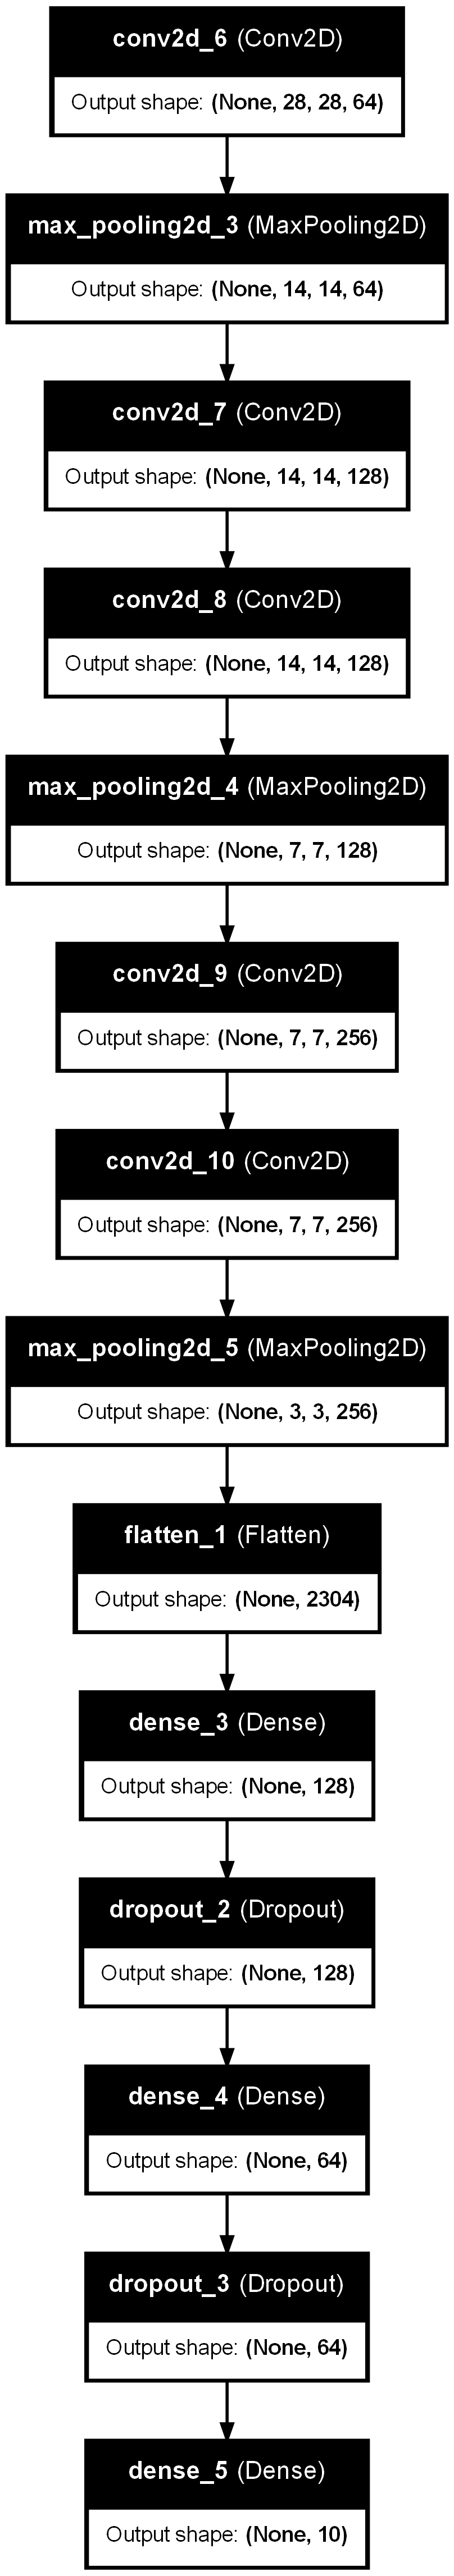

In [49]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,504 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,670 (10.79 MB)

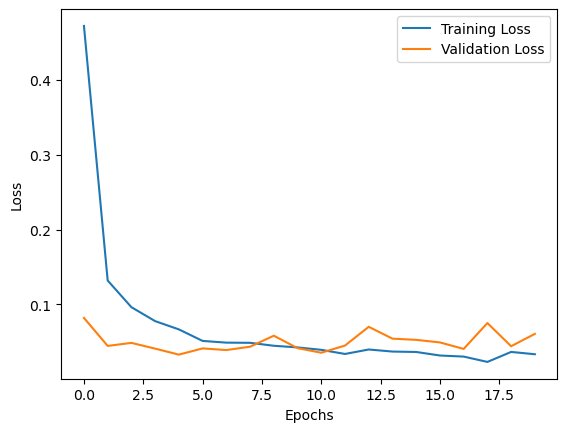

In [54]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()